In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model20a-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/20
261/261 [==============================] - ETA: 0s - loss: 0.3286 - accuracy: 0.8466

INFO:tensorflow:Assets written to: model20a-001.model\assets


INFO:tensorflow:Assets written to: model20a-001.model\assets


261/261 [==============================] - 1274s 5s/step - loss: 0.3286 - accuracy: 0.8466 - val_loss: 0.1695 - val_accuracy: 0.9420
Epoch 2/20
261/261 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9394

INFO:tensorflow:Assets written to: model20a-002.model\assets


INFO:tensorflow:Assets written to: model20a-002.model\assets


261/261 [==============================] - 1365s 5s/step - loss: 0.1609 - accuracy: 0.9394 - val_loss: 0.1301 - val_accuracy: 0.9487
Epoch 3/20
261/261 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9542

INFO:tensorflow:Assets written to: model20a-003.model\assets


INFO:tensorflow:Assets written to: model20a-003.model\assets


261/261 [==============================] - 1174s 4s/step - loss: 0.1168 - accuracy: 0.9542 - val_loss: 0.1016 - val_accuracy: 0.9626
Epoch 4/20
261/261 [==============================] - 1253s 5s/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 0.1128 - val_accuracy: 0.9602
Epoch 5/20
261/261 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9734

INFO:tensorflow:Assets written to: model20a-005.model\assets


INFO:tensorflow:Assets written to: model20a-005.model\assets


261/261 [==============================] - 1245s 5s/step - loss: 0.0750 - accuracy: 0.9734 - val_loss: 0.0989 - val_accuracy: 0.9640
Epoch 6/20
261/261 [==============================] - 1221s 5s/step - loss: 0.0587 - accuracy: 0.9787 - val_loss: 0.1199 - val_accuracy: 0.9573
Epoch 7/20
261/261 [==============================] - 1202s 5s/step - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.1171 - val_accuracy: 0.9640
Epoch 8/20
261/261 [==============================] - 1270s 5s/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.1400 - val_accuracy: 0.9559
Epoch 9/20
261/261 [==============================] - 1253s 5s/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.1066 - val_accuracy: 0.9669
Epoch 10/20
261/261 [==============================] - 1234s 5s/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.1051 - val_accuracy: 0.9707
Epoch 11/20
261/261 [==============================] - 1306s 5s/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.1243 - val_accuracy: 0.9635
E

In [5]:
model.save("my_h5_model.h5")

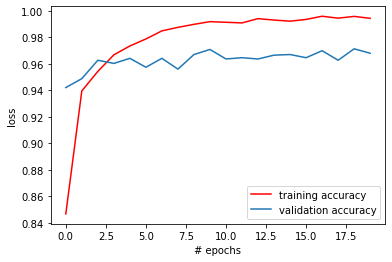

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

37/37 [==============================] - 60s 2s/step - loss: 0.0915 - accuracy: 0.9733
[0.09145526587963104, 0.9732528328895569]
